# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# Your code here
boston = pd.read_csv("../data/boston_data.csv")

In [53]:
boston.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
5,0.08370,45.0,3.44,0.0,0.437,7.185,38.9,4.5667,5.0,398.0,15.2,396.90,5.39,34.9
6,0.19073,22.0,5.86,0.0,0.431,6.718,17.5,7.8265,7.0,330.0,19.1,393.74,6.56,26.2
7,0.26938,0.0,9.90,0.0,0.544,6.266,82.8,3.2628,4.0,304.0,18.4,393.39,7.90,21.6
8,10.06230,0.0,18.10,0.0,0.584,6.833,94.3,2.0882,24.0,666.0,20.2,81.33,19.69,14.1
9,1.41385,0.0,19.58,1.0,0.871,6.129,96.0,1.7494,5.0,403.0,14.7,321.02,15.12,17.0


In [54]:
Q1 = boston.quantile(0.25)
Q3 = boston.quantile(0.75)
IQR = Q3 - Q1

In [55]:
boston = boston[~((boston < (Q1 - 1.5 * IQR)) | (boston > (Q3 + 1.5 * IQR)))]

In [56]:
boston.isna().sum()

crim       42
zn         49
indus       0
chas       28
nox         0
rm         21
age         0
dis         5
rad         0
tax         0
ptratio    12
black      61
lstat       2
medv       27
dtype: int64

In [57]:
boston = boston.fillna(boston.median())

In [58]:
boston.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
5,0.08370,0.0,3.44,0.0,0.437,7.185,38.9,4.5667,5.0,398.0,15.2,396.90,5.39,34.9
6,0.19073,22.0,5.86,0.0,0.431,6.718,17.5,7.8265,7.0,330.0,19.1,393.74,6.56,26.2
7,0.26938,0.0,9.90,0.0,0.544,6.266,82.8,3.2628,4.0,304.0,18.4,393.39,7.90,21.6
8,0.19103,0.0,18.10,0.0,0.584,6.833,94.3,2.0882,24.0,666.0,20.2,392.92,19.69,14.1
9,1.41385,0.0,19.58,0.0,0.871,6.129,96.0,1.7494,5.0,403.0,14.7,392.92,15.12,17.0


### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.
**Hint:** Use the Seaborn *pairplot* function ([documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html))

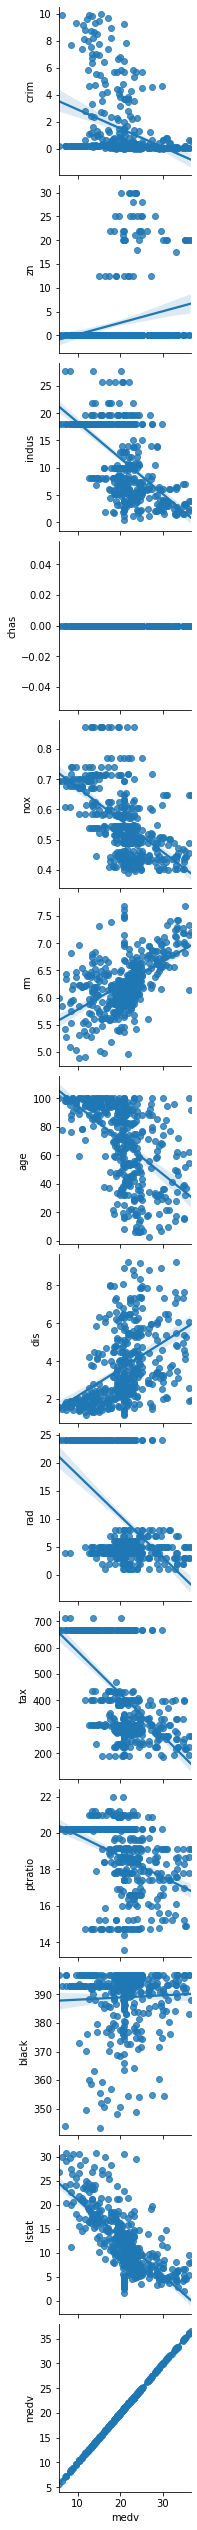

In [59]:
# Your plots here
sns.pairplot(data=boston, x_vars="medv", y_vars=boston.columns, kind="reg")

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [ ]:
# Your response here
"""
From the variables above, there are some of them that have no correlation at all for the price, like the "chas" graph.
Other graphs that I had in mind with a high correlation with the price, like "lstat", "crim" or "rm"
Last, some of them that I thought it might influence more like "black" or "zn"
"""

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

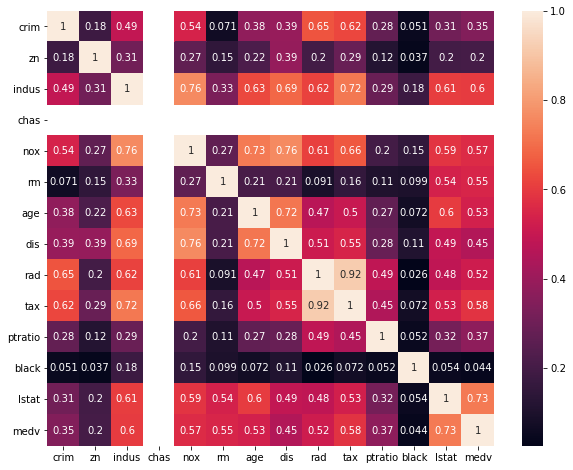

In [62]:
# Your response here
fig, ax = plt.subplots(figsize=(10,8))

corrMatrix = boston.corr().abs()

sns.heatmap(corrMatrix, annot=True)

In [63]:
upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
to_drop

['tax']

In [65]:
boston.drop(columns=to_drop, inplace=True)
boston.drop(columns="chas", inplace=True)

In [66]:
boston.head()

,crim,zn,indus,nox,rm,age,dis,rad,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.413,5.961,17.5,5.2873,4.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.453,5.927,47.2,6.9320,8.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.544,5.972,76.7,3.1025,4.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.871,5.597,94.9,1.5257,5.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.439,6.115,63.0,6.8147,4.0,16.8,393.97,9.43,20.5


### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation.
**Hint:** Use the Pandas *series.describe* method ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.describe.html))

In [67]:
# Your code here
boston["medv"].describe()

count    404.000000
mean      20.845297
std        6.229765
min        5.600000
25%       17.200000
50%       20.900000
75%       23.900000
max       36.500000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [24]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test (include a *random_state* parameter, see [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

In [71]:
# Your code here
from sklearn.model_selection import train_test_split

X = boston.drop(columns="medv")
y = boston["medv"]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 123)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [89]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor

parameter = [2, 4, 6, 8, 10]
train_set = []
test_set = []

for par in parameter:
    RF = RandomForestRegressor(max_depth=par, random_state=123)
    RF.fit(X_train, y_train)
    train_score = RF.score(X_train, y_train)
    
    print(f"Train Score Max Depth {par}: {train_score}")
    train_set.append(train_score)
    
    y_pred = RF.predict(X_test)
    test_score = performance_metric(y_test, y_pred)
    print(f"Test Score Max Depth {par}: {test_score}\n")
    test_set.append(test_score)

Train Score Max Depth 2: 0.707388036025175
Test Score Max Depth 2: 0.5426792846225108

Train Score Max Depth 4: 0.8478813648788718
Test Score Max Depth 4: 0.5956361988353185

Train Score Max Depth 6: 0.9251895309663583
Test Score Max Depth 6: 0.6179711282737097

Train Score Max Depth 8: 0.9548758396160909
Test Score Max Depth 8: 0.6227720050647146

Train Score Max Depth 10: 0.9613633613539405
Test Score Max Depth 10: 0.6276474258147582



Now, plot the score for each tree on the training set and on the testing set.

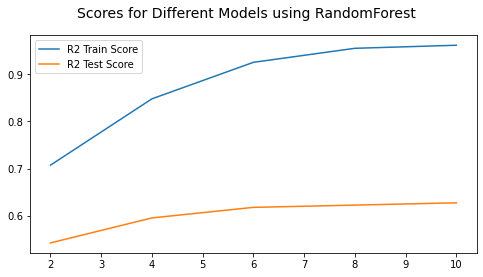

In [112]:
# Produce a plot with the score for the testing and training for the different max depths
fig, ax = plt.subplots(1, 1, figsize=(8,4))

fig.suptitle("Scores for Different Models using RandomForest", size=14)

ax.plot(parameter, train_set, label="R2 Train Score")
ax.plot(parameter, test_set, label="R2 Test Score")

ax.legend()
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here
"""
Although the train score keeps increasing, when the max_depth is above 6 the results doesn't improve on the test set
Also, the improvement from 4 to 6 is not as big on the test set compared with the train set, that's why we should pick 4.
"""

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [115]:
# Your response here
"""
When the model is trained with a maximum depth of 1, the model suffer from high bias.

When the model is trained with a maximum depth of 10, the model suffer from high variance.
"""

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [114]:
# Your response here
for i in range(1, 11):
    # Initialize
    RF = RandomForestRegressor(max_depth=i)
    
    # Training model
    RF.fit(X_train, y_train)
    RF_train_score = RF.score(X_train, y_train)
    
    # Test model
    test_pred = RF.predict(X_test)
    RF_test_score = r2_score(y_test, test_pred)
    
    #Getting difference
    RF_difference = RF_train_score - RF_test_score
    
    print(f"RF Max Depth: {i} | Train Score: {RF_train_score} | Test Score: {RF_test_score} | Difference: {RF_difference}")
    
"""
The best point I think it would be with a max_depth of 3, as the train score it not as biased as at the beggining and
the difference with the test set is minimum.
"""

RF Max Depth: 1 | Train Score: 0.5040328175880328 | Test Score: 0.4456448615514782 | Difference: 0.058387956036554556
RF Max Depth: 2 | Train Score: 0.7121094550868547 | Test Score: 0.5488414811942033 | Difference: 0.16326797389265146
RF Max Depth: 3 | Train Score: 0.7930455967921238 | Test Score: 0.5910139757925434 | Difference: 0.20203162099958039
RF Max Depth: 4 | Train Score: 0.8492826400245218 | Test Score: 0.6007199110376599 | Difference: 0.24856272898686194
RF Max Depth: 5 | Train Score: 0.8953304412671258 | Test Score: 0.6203897585267815 | Difference: 0.27494068274034433
RF Max Depth: 6 | Train Score: 0.9277140930234182 | Test Score: 0.6221972699239202 | Difference: 0.305516823099498
RF Max Depth: 7 | Train Score: 0.9464365104087262 | Test Score: 0.6229091318672499 | Difference: 0.3235273785414763
RF Max Depth: 8 | Train Score: 0.9580182685267279 | Test Score: 0.627315596614962 | Difference: 0.33070267191176594
RF Max Depth: 9 | Train Score: 0.9611032284700433 | Test Score: 0.6

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here
"""
1. It's not relevant for today's world, as the data has changed.
2. Yes and no. There are some features that might describe a home and the price influence, but not all of them.
3. No, it doesn't have enough data.
4. No, because the data from Bostom is going to be completly different to a rural city.
"""